In [1]:
import sys
sys.path.append('../src')

In [2]:
import numpy as np
from structure_learning.samplers import StructureMCMC
from structure_learning.data import SyntheticDataset, Data
# for reproducibility
np.random.seed(100)

In [3]:
# setup synthetic data

num_nodes = 5
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2

synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

00010 00100 10000 00000 01010


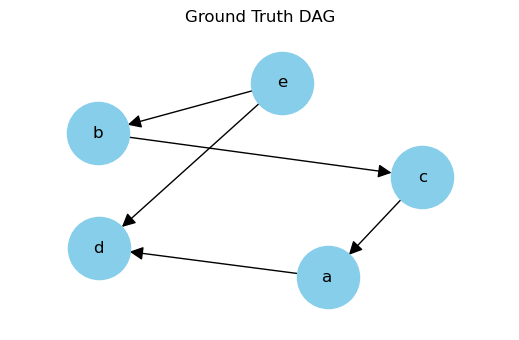

In [4]:
# visualise ground truth DAG
synthetic_data.graph.plot(title="Ground Truth DAG")

In [5]:
synthetic_data.data

In [6]:
# setup mcmc
n_iterations = 100000
print(synthetic_data.data, synthetic_data.data.values)
M = StructureMCMC(data=synthetic_data.data, score_object='bge', max_iter=n_iterations, pc_init=False)

<structure_learning.data.data.Data object at 0x16805d9d0>             a         b         c          d         e
0   -0.196445 -0.039365  0.005593  -0.453780 -0.453966
1    0.928469  0.584385 -0.133857   1.102345 -0.030515
2   -0.195909 -1.806724 -1.310008   0.987758 -0.783253
3    3.672439 -1.553858 -2.504501   5.624512 -1.207085
4    2.118560 -1.030663 -0.707275   2.436619  0.005117
..        ...       ...       ...        ...       ...
195 -3.726553  1.021710  2.485784  -5.164662  1.223314
196  8.735060 -2.204730 -4.911152  11.896884 -1.547577
197 -8.914967  2.234533  5.129776  -7.948369  1.181551
198  2.846533 -1.604027 -1.664003   3.002756 -0.592358
199  2.255836 -0.702683 -1.311533   3.316782 -0.928191

[200 rows x 5 columns]


In [7]:
# run experiment
mcmc_results, acceptance = M.run()

In [8]:

print('Acceptance_ratio:', acceptance)

Acceptance_ratio: 0.17359


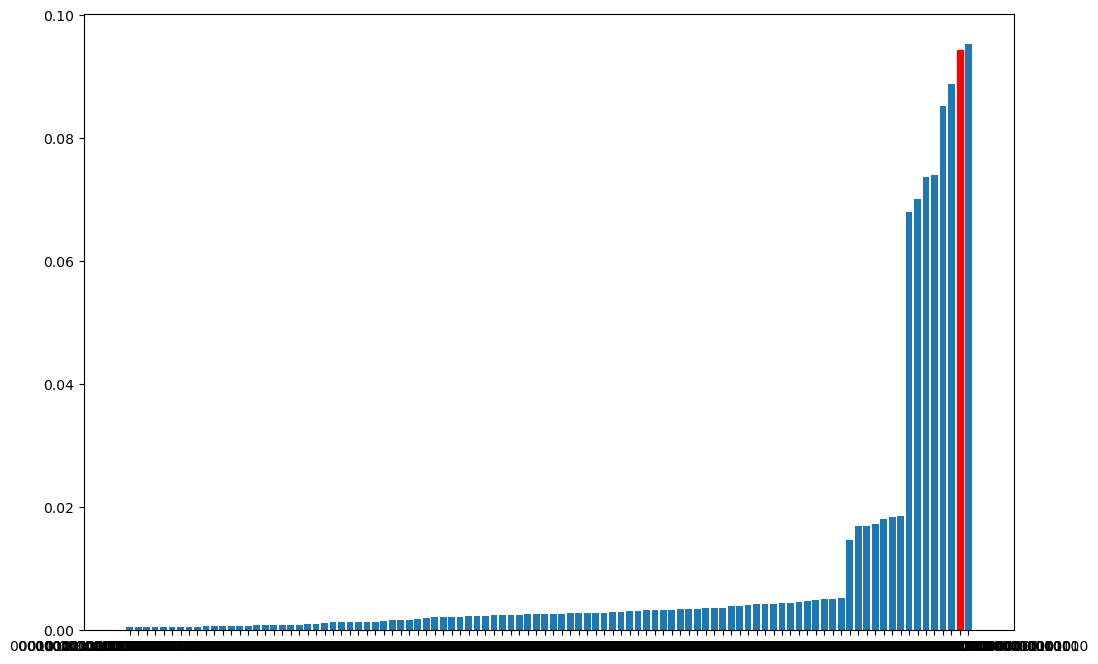

In [9]:
from matplotlib import pyplot as plt

key = synthetic_data.graph.to_key()
plt.rcParams['figure.figsize'] = 12,8
bars, keys, counts = mcmc_results.plot(sort=True, normalise=True, limit=100)
bars[np.where(np.array(keys)==key)[0][0]].set_color('red')

In [10]:
from structure_learning.distributions import Distribution
from structure_learning.scores import BGeScore, BDeuScore

true_dist = Distribution.compute_distribution(synthetic_data.data, score=BGeScore)

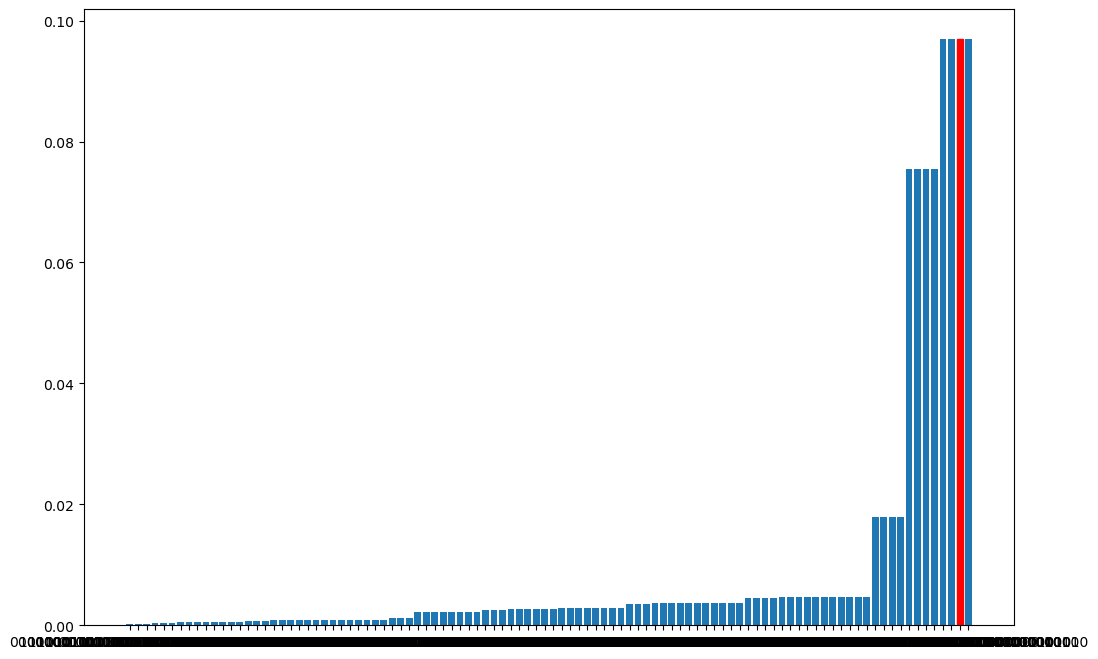

In [11]:

bars2, keys, counts = true_dist.plot(prop='p', sort=True, limit=100)
bars2[np.where(np.array(keys)==key)[0][0]].set_color('red')